<a href="https://colab.research.google.com/github/rahulkumar1502/ERA-V2/blob/main/Assignment-5/ERA_V2_S5_Rahul_Kumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
sys.path.append('/content')

In [2]:
import torch
import torch.optim as optim
import torch.nn.functional as F
from torchsummary import summary
from torchvision import datasets, transforms
from model import Net,Net2
from utils import *

In [3]:
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? False


In [4]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [6]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

512
512


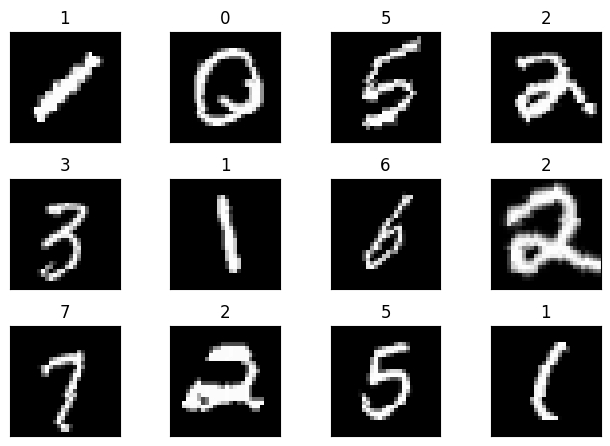

In [7]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))
print(len(batch_data))
print(len(batch_label))
fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [8]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


In [9]:
train_losses = []
test_losses = []
train_acc = []
test_acc = []
test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [10]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_acc, train_losses = train(model, device, train_loader, optimizer, criterion, train_acc, train_losses)
  test_acc, test_losses = test(model, device, test_loader, criterion, test_acc, test_losses)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=1.8410 Batch_id=117 Accuracy=30.34: 100%|██████████| 118/118 [01:45<00:00,  1.12it/s]


Test set: Average loss: 1.7469, Accuracy: 4867/10000 (48.67%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1608 Batch_id=117 Accuracy=85.09: 100%|██████████| 118/118 [01:43<00:00,  1.14it/s]


Test set: Average loss: 0.1191, Accuracy: 9638/10000 (96.38%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1049 Batch_id=117 Accuracy=95.48: 100%|██████████| 118/118 [01:45<00:00,  1.12it/s]


Test set: Average loss: 0.0698, Accuracy: 9773/10000 (97.73%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.2029 Batch_id=117 Accuracy=96.50: 100%|██████████| 118/118 [01:45<00:00,  1.12it/s]


Test set: Average loss: 0.0573, Accuracy: 9814/10000 (98.14%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0445 Batch_id=117 Accuracy=97.24: 100%|██████████| 118/118 [01:44<00:00,  1.13it/s]


Test set: Average loss: 0.0488, Accuracy: 9833/10000 (98.33%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0801 Batch_id=117 Accuracy=97.69: 100%|██████████| 118/118 [01:44<00:00,  1.13it/s]


Test set: Average loss: 0.0486, Accuracy: 9841/10000 (98.41%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0181 Batch_id=117 Accuracy=97.92: 100%|██████████| 118/118 [01:44<00:00,  1.12it/s]


Test set: Average loss: 0.0371, Accuracy: 9880/10000 (98.80%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0450 Batch_id=117 Accuracy=98.08: 100%|██████████| 118/118 [01:46<00:00,  1.10it/s]


Test set: Average loss: 0.0335, Accuracy: 9898/10000 (98.98%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.1408 Batch_id=117 Accuracy=98.24: 100%|██████████| 118/118 [03:39<00:00,  1.86s/it]


Test set: Average loss: 0.0366, Accuracy: 9875/10000 (98.75%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0563 Batch_id=117 Accuracy=98.32: 100%|██████████| 118/118 [04:07<00:00,  2.09s/it]


Test set: Average loss: 0.0389, Accuracy: 9875/10000 (98.75%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0122 Batch_id=117 Accuracy=98.42: 100%|██████████| 118/118 [04:03<00:00,  2.06s/it]


Test set: Average loss: 0.0337, Accuracy: 9894/10000 (98.94%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0551 Batch_id=117 Accuracy=98.58: 100%|██████████| 118/118 [04:02<00:00,  2.05s/it]


Test set: Average loss: 0.0270, Accuracy: 9915/10000 (99.15%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0042 Batch_id=117 Accuracy=98.63: 100%|██████████| 118/118 [03:42<00:00,  1.89s/it]


Test set: Average loss: 0.0269, Accuracy: 9914/10000 (99.14%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0382 Batch_id=117 Accuracy=98.73: 100%|██████████| 118/118 [03:44<00:00,  1.90s/it]


Test set: Average loss: 0.0243, Accuracy: 9919/10000 (99.19%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0589 Batch_id=117 Accuracy=98.81: 100%|██████████| 118/118 [02:29<00:00,  1.27s/it]


Test set: Average loss: 0.0251, Accuracy: 9915/10000 (99.15%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0115 Batch_id=117 Accuracy=98.98: 100%|██████████| 118/118 [01:43<00:00,  1.14it/s]


Test set: Average loss: 0.0221, Accuracy: 9922/10000 (99.22%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0275 Batch_id=117 Accuracy=99.04: 100%|██████████| 118/118 [01:51<00:00,  1.06it/s]


Test set: Average loss: 0.0216, Accuracy: 9923/10000 (99.23%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0474 Batch_id=117 Accuracy=99.07: 100%|██████████| 118/118 [02:20<00:00,  1.19s/it]


Test set: Average loss: 0.0210, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0847 Batch_id=117 Accuracy=99.06: 100%|██████████| 118/118 [02:40<00:00,  1.36s/it]


Test set: Average loss: 0.0211, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.1014 Batch_id=117 Accuracy=99.08: 100%|██████████| 118/118 [01:43<00:00,  1.14it/s]


Test set: Average loss: 0.0209, Accuracy: 9924/10000 (99.24%)

Adjusting learning rate of group 0 to 1.0000e-03.


Text(0.5, 1.0, 'Test Accuracy')

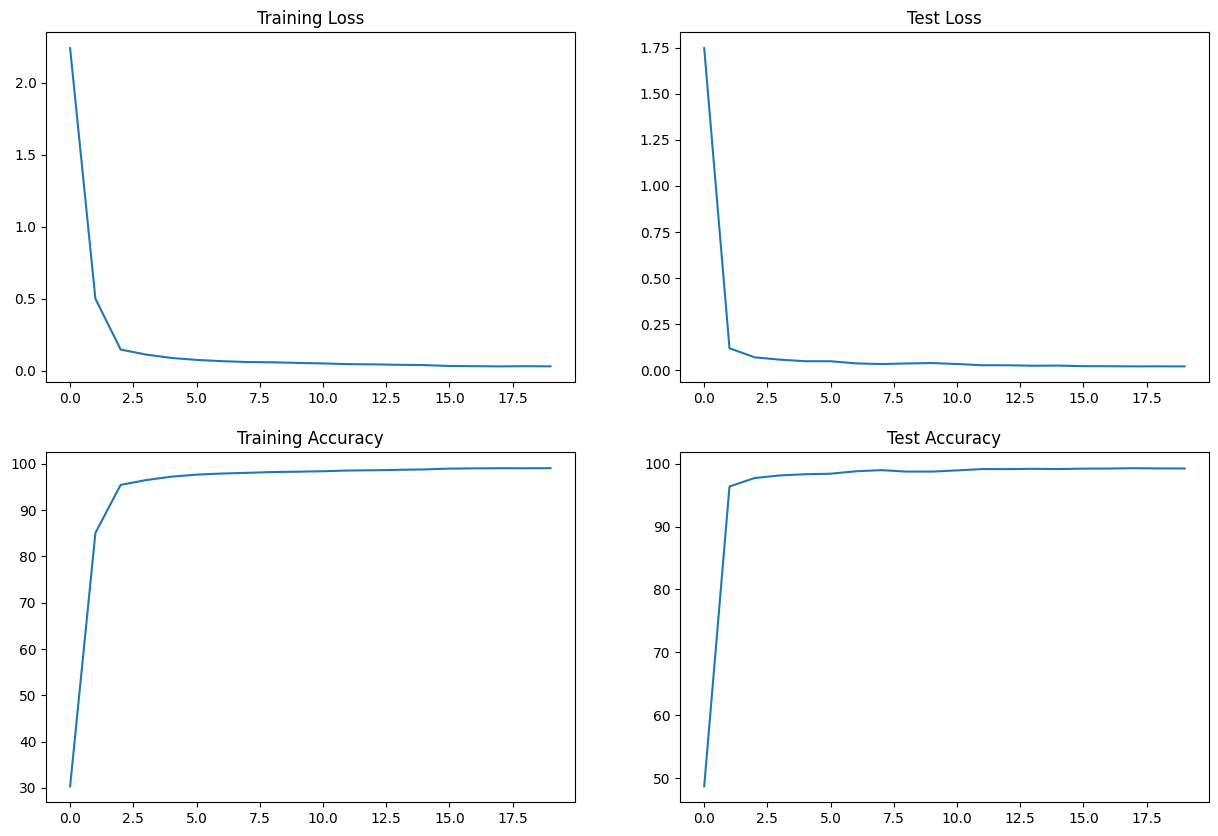

In [11]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")